In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
offsets1 = np.random.random(size = 7)
offsets2 = np.random.random(size = 7)
offsets3 = np.random.random(size = 7)

In [43]:
x_ax = np.linspace(-5,5,500)

Класс 0(Мыж программисты, начнем с нуля)

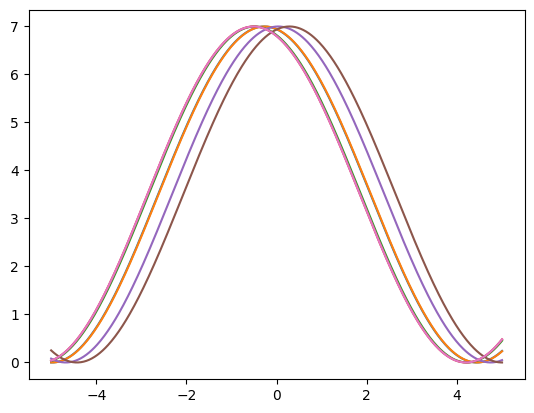

In [51]:
signal1 = [(1+np.sin((2+x_ax+offsets1[i])/1.5))*3.5 for i in range(7)]
for i in signal1:
    plt.plot(x_ax,i)


Класс 1

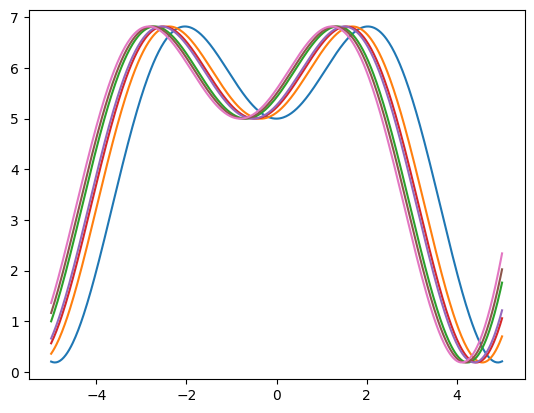

In [52]:
signal2 = [5+np.sin(x_ax+offsets2[i])*(x_ax+offsets2[i]) for i in range(7)]
for i in signal2:
    plt.plot(x_ax,i)


Класс 2

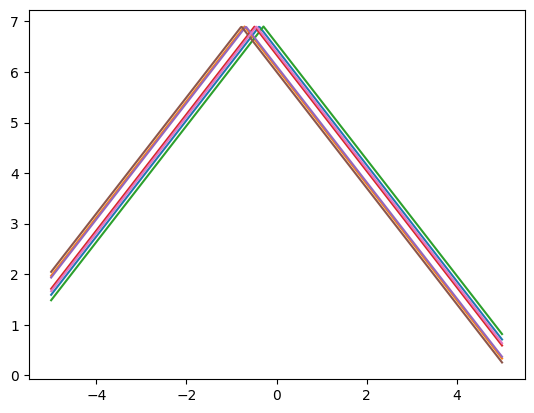

In [53]:
signal3 = [(6+(-np.abs(x_ax+offsets3[i])))*1.15 for i in range(7)]
for i in signal3:
    plt.plot(x_ax,i)


In [54]:
def distance_matrix(x, y, q) -> np.array:
    """
    Функция  рассчета  матрицы  расстояний между точками двух рядов 
    """
    mdist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            mdist[i,j] = np.abs((x[j]-y[i]))**q
    return mdist

In [55]:
# Посчитаем DTW для двух временных рядов
# Сначала напишем функцию, которая это все вычисляет


def DTW(x, x_s, q=1, isDTW=True):
    '''
        x: первый ряд
        x_s : второй ряд
        q : степень для вычисления базового расстояния
    '''
    N = len(x) # Считаем, что ряды равной длины. Но это не всегда так, перепишите функцию для 
               # вычисления расстояния между рядами, длины которых не равны
    M = len(x_s)
    # Строим матрицу согласно реккурентной формуле, полученной выше. Матрица в нашем случае будет размерности 

    dist = distance_matrix(x,x_s,q=2)
    
    R = [[0] * (M+1) for i in range(N+1)]
   
    for i in range(1,N): 
        R[i][0] = dist[i,0] + R[i-1][0] 
    for j in range(1,M):
        R[0][j] = dist[0,j] + R[0][j-1]
    
    # проверяем, что записалось
    #print("Начинаем заполнять матрицу R")
    #for i in range(N+1): 
    #    print(R[i])

    k = 0
    if isDTW:
        k = 1
    
    # начинаем расчет по реккурентной формуле
  
    for i in range(1,N+1): 
        for j in range(1,M+1):
            R[i][j] = dist[i-1,j-1] + k*np.min([R[i-1][j-1], R[i][j-1], R[i-1][j]]) 

    # проверяем, что записалось
    # print("\nпосле заполнения матрицы R")
    #for i in range(N+1): 
    #    print(R[i])

    # ищем минимальный путь. Начинаем от нижнего правого угла.
    pth = []   # лист с кортежами индексов пути
    i = N
    j = M
    while i >= 0 and j >= 0:
        pth.append((i,j))
        if R[i][j-1] <= R[i-1][j-1] and R[i][j-1] <= R[i-1][j]:
            I = i
            J = j-1                
        
        if R[i-1][j] <= R[i-1][j-1] and R[i-1][j] <= R[i][j-1]:
            I = i - 1
            J = j 

        if R[i-1][j-1] <= R[i][j-1] and R[i-1][j-1] <= R[i-1][j]:
            I = i - 1
            J = j - 1
        
        i = I
        j = J
    
            
    #print("\nПуть:")
    #print(pth)

    #Считаем расстояние между двумя рядами
    s = 0
    for l in pth:
        s += R[l[0]][l[1]]
    s = s/len(pth) 

    return s, pth, R


In [57]:
def compare_signals_DTW(sig1,sig2):
    ans = [[0]*len(sig2) for i in range(len(sig1))]
    for i in range(len(sig1)):
        for j in range(len(sig2)):
            ans[i][j] = DTW(sig1[i],sig2[j], q = 2)[0]
    return ans

In [58]:
def compare_signals_Euclid(sig1,sig2):
    ans = [[0]*len(sig2) for i in range(len(sig1))]
    for i in range(len(sig1)):
        for j in range(len(sig2)):
            ans[i][j] = np.sqrt(np.sum((sig1[i]-sig2[j])**2))
    return ans

Далее посмотрим на метрики для каждой пары функций из разных классов

In [59]:
for i in compare_signals_DTW(signal1, signal2):
    print(*i)

34.15713594340561 37.20601476322531 66.06251751854622 42.63547289617203 46.11196921114182 80.19678713458977 101.53842661761118
51.41572990622504 54.32510412817255 83.13488188072874 59.54230182447297 63.1446846542968 97.3184198349797 118.81424391619568
52.439058570229626 53.878289745508816 73.52915324996627 57.05000086082229 59.46792459922874 83.96537268974299 100.2339913667968
52.30526194124707 53.726814786032854 72.42552017474095 56.77033733823451 58.986230024891164 82.53712521630791 98.13774313162665
50.01856895251676 53.617603626756434 94.33640440677298 61.46589346072084 66.61491912432392 113.48273030569959 141.70090719511904
31.08762593427842 34.98552664885182 83.46832112943584 44.29275552895262 50.490371981963364 106.1168822493644 139.41695091752143
52.29685797212327 53.6777955997288 72.40394416560281 56.75826874421103 58.97240895878512 82.51088145061597 98.10411682385745


In [60]:
for i in compare_signals_Euclid(signal1, signal2):
    print(*i)

47.75427580180948 47.269179735364155 48.61276655396742 47.58551797642788 47.77798314911121 49.08329808140124 49.695477559946724
47.721788620145084 47.280121066521545 48.664623803337285 47.613204887896785 47.81182585056987 49.142420460531554 49.762421858833704
48.931150069237844 47.34650890087015 47.5939738113419 47.22168430698476 47.24944175855898 47.86312484140572 48.2559616499029
49.101969598268795 47.398672341442555 47.52048526539759 47.22417662603553 47.233082129672376 47.76571478514005 48.13218159546331
47.2267437887093 48.359987220728385 51.118376288642665 49.26777027255955 49.67332370873275 51.829318063084536 52.696517567479134
47.85020891834185 50.19557448647769 53.874202644356934 51.50380296759616 52.048164305326004 54.72810653216476 55.74211207761435
49.10420562046755 47.399396999396934 47.51959957542335 47.22426588950747 47.232929831843755 47.764521388593245 48.13064856980592


In [61]:
for i in compare_signals_DTW(signal2, signal3):
    print(*i)

98.1255022626885 123.29539566168576 76.01053857852409 108.84792573910414 118.83906472264283 132.67117880256805 104.54224813982489
67.25294948735065 72.56384320976558 50.26282720488303 72.1305018807637 70.22430118763661 77.21543377028348 70.0724787206524
53.19019542073638 57.40624664221761 52.273322265015786 54.02867733088128 43.90382051045266 45.989500182560704 53.620677363840606
59.37138043266848 58.22194392054968 43.967788565915015 62.398795510538235 56.55513724340955 61.248526639644176 61.09395855686813
57.19535728541645 53.883976413404355 42.3862918036082 59.661646654000194 52.49525174175807 56.437618401663066 58.60079263956553
52.50120721294788 42.45127277123569 39.38876910318919 52.95857521565467 41.927034888174475 43.28757151798839 52.69769792541712
52.52610669838669 41.46278964755632 39.80965874131152 52.74528253632304 40.87893209564225 41.698174919842344 52.723499349956654


In [62]:
for i in compare_signals_Euclid(signal2, signal3):
    print(*i)

34.265556311145176 36.542676407444844 33.857073620761156 34.84362295468803 36.27773995036504 37.17606226902781 34.59915616032437
33.058085622515236 33.60223155329525 33.16679151738774 33.07508761438364 33.491455248237116 33.89466535099109 33.05129467480514
33.86075770843678 32.90098441203774 34.390468961194046 33.40714466821392 32.93023340371346 32.87936199615579 33.57022749153333
33.13339919466955 33.03535812658274 33.42516103746683 32.94740637996308 32.98354710489877 33.196156187735646 33.00400796134934
33.243940575628166 32.91759064020995 33.59960658230847 32.98649639801537 32.88702804267714 33.030745572770364 33.07147164576947
34.25269739804912 33.05631050360638 34.84618605195324 33.72661855025388 33.10825263245035 32.98326693487287 33.918633250276095
34.78617788009599 33.350522003388 35.44345339811019 34.18730099322023 33.42562830845178 33.22480595286249 34.408424561064884


In [63]:
for i in compare_signals_DTW(signal2, signal3):
    print(*i)

98.1255022626885 123.29539566168576 76.01053857852409 108.84792573910414 118.83906472264283 132.67117880256805 104.54224813982489
67.25294948735065 72.56384320976558 50.26282720488303 72.1305018807637 70.22430118763661 77.21543377028348 70.0724787206524
53.19019542073638 57.40624664221761 52.273322265015786 54.02867733088128 43.90382051045266 45.989500182560704 53.620677363840606
59.37138043266848 58.22194392054968 43.967788565915015 62.398795510538235 56.55513724340955 61.248526639644176 61.09395855686813
57.19535728541645 53.883976413404355 42.3862918036082 59.661646654000194 52.49525174175807 56.437618401663066 58.60079263956553
52.50120721294788 42.45127277123569 39.38876910318919 52.95857521565467 41.927034888174475 43.28757151798839 52.69769792541712
52.52610669838669 41.46278964755632 39.80965874131152 52.74528253632304 40.87893209564225 41.698174919842344 52.723499349956654


In [64]:
for i in compare_signals_Euclid(signal1, signal3):
    print(*i)

26.054150860219124 27.89673040566236 26.013100077048446 26.359169756946635 27.623295739835342 28.57929526542417 26.20648979062482
26.086693243992016 28.002089321095962 26.02236309170215 26.41655257138561 27.72275691673993 28.697147673765045 26.254192447919593
25.90516095274777 25.734538224795433 26.460019907507323 25.54970944170564 25.632992690541244 26.047807567433885 25.657542508538942
25.97287658883938 25.56845287900238 26.5912487387914 25.54409107315511 25.488077140588054 25.83547440553439 25.681230786771305
28.491318659756853 32.666578578064154 27.642648998528582 29.621901628506667 32.213173519323796 33.72614154145904 29.15163732380366
31.954410977922212 37.394987949690794 30.616636682704584 33.55512103409035 36.850281427965484 38.642908244448854 32.90727636251454
25.973853404992518 25.566435880429182 26.593031591914016 25.544133437513015 25.486332974905128 25.832860181439617 25.681647084735346


После этих прекрасных 6 таблиц 7х7, я сделал следующий вывод - DTW более чувствительный. При сравнении рядов которые отличаются небольшим сдвигом DTW может поменять достаточно сильно(Увеличивалась типа в три раза), в то время как евклидова метрика менялась не очень сильно.

In [15]:
x_train, y_train, x_test, y_test = [],[],[],[]
x_train = signal1[:5]+signal2[:5]+signal3[:5]
x_test = signal1[5:]+signal2[5:]+signal3[5:]
y_train = [0]*5+[1]*5+[2]*5
y_test = [0]*2+[1]*2+[2]*2


In [71]:
from pyts.classification import KNeighborsClassifier
from pyts.classification import TimeSeriesForest

DTW_clf = KNeighborsClassifier(metric = "dtw")
DTW_clf.fit(x_train, y_train)

Euclid_clf = KNeighborsClassifier(metric = "minkowski", p = 2)
Euclid_clf.fit(x_train, y_train)

forest_clf = TimeSeriesForest(random_state=43)
forest_clf.fit(x_train, y_train)


TimeSeriesForest(random_state=43)

In [70]:
print(f"Accuracy DTW {DTW_clf.score(x_test, y_test)}")
print(f"Accuracy Euclid {Euclid_clf.score(x_test, y_test)}")
print(f"Accuracy Forest {forest_clf.score(x_test, y_test)}")


Accuracy DTW 1.0
Accuracy Euclid 1.0
Accuracy Forest 1.0


Все модели справились на 100%, что в общем наверное не удивительно

Я ещё просто из интереса решил посмотреть что скажут классификаторы на зашумленную функцию. 

In [73]:
b = (1+np.sin((2+x_ax)/1.5))*3.5 + np.random.normal(scale = 0.2, size = 500)

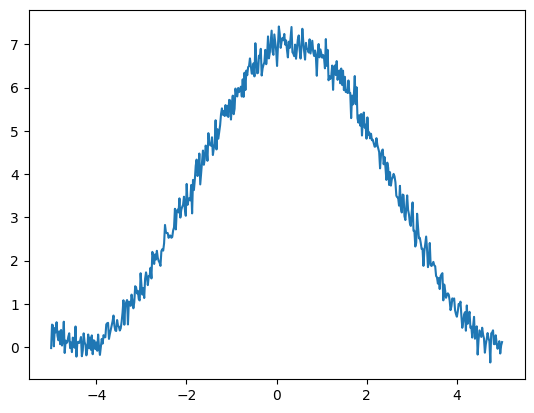

In [76]:
plt.plot(x_ax,b)

In [77]:
print(f"Вектор вероятности принадлежности к классам DTW {DTW_clf.predict_proba(b.reshape(1, -1))}")
print(f"Вектор вероятности принадлежности к классам Euclid {Euclid_clf.predict_proba(b.reshape(1, -1))}")
print(f"Вектор вероятности принадлежности к классам Forest {forest_clf.predict_proba(b.reshape(1, -1))}")

Вектор вероятности принадлежности к классам DTW [[1. 0. 0.]]
Вектор вероятности принадлежности к классам Euclid [[1. 0. 0.]]
Вектор вероятности принадлежности к классам Forest [[0.738 0.166 0.096]]


Все три классификатора сказали что это класс 0. Что в общем достаточно близкр к правде
